In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

/home/Jupyterhub/2023184032/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED



# Algorithm: Shortest Path Calculation 

1. **Initialize Graph:**
   - Given a list of edges, create a set of unique vertices.
   - Map each vertex to an index.
   - Initialize a distance matrix with infinity (`inf`) and set the diagonal to 0 (distance from a vertex to itself).
   - Populate the matrix with the weights of the given edges.

2. **Recursion:**
   - For each vertex `k` (starting from `0` to `n-1`), iterate over all pairs of vertices `(i, j)`.
   - If the distance from `i` to `j` via `k` is shorter than the direct distance, update the distance matrix.

3. **Plot the Graph:**
   - Create a graph using `networkx` and add the edges.
   - Use `spring_layout` to position nodes visually.
   - Display the graph with the shortest path from a source to a destination node highlighted in red.

4. **Output the Final Shortest Path Matrix:**
   - Display the final shortest distance matrix.

### Steps:
1. Parse the list of edges and initialize the graph.
2. Apply the Recursion to calculate the shortest paths.
3. Plot the graph showing the shortest path between the source and destination.
4. Display the shortest distance matrix.

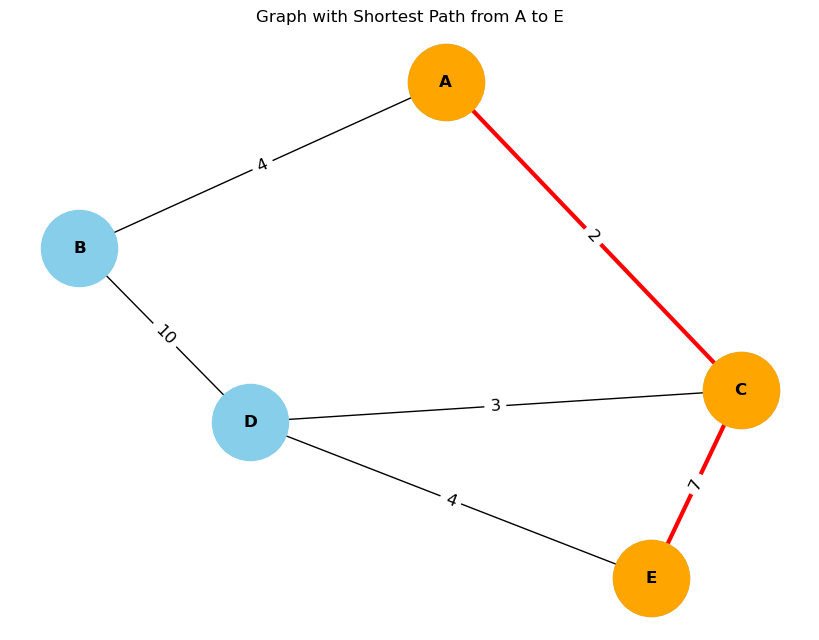

Final shortest distance matrix:
   A   B  C  D   E
A  0   4  2  5   9
B  4   0  6  9  13
C  2   6  0  3   7
D  5   9  3  0   4
E  9  13  7  4   0


In [2]:

def initialize_graph(edges):

    vertices = sorted(list(set([u for u, v, _ in edges] + [v for u, v, _ in edges])))

    index = {vertex: i for i, vertex in enumerate(vertices)}

    n = len(vertices)
    dist = [[float('inf')] * n for _ in range(n)]

    for i in range(n):
        dist[i][i] = 0

    for u, v, weight in edges:
        u_index = index[u]
        v_index = index[v]
        dist[u_index][v_index] = weight
        dist[v_index][u_index] = weight  
    
    return vertices, index, dist


def recursive(k, dist, vertices, n):

    if k == n:
        return dist

    for i in range(n):
        for j in range(n):
            if dist[i][j] > dist[i][k] + dist[k][j]:
                dist[i][j] = dist[i][k] + dist[k][j]

    return recursive(k + 1, dist, vertices, n)


def plot_single_optimal_path(edges, vertices, final_dist, source, destination):
 
    G = nx.Graph()

    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G)  # Positioning of nodes

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    if source in vertices and destination in vertices:
        path = nx.shortest_path(G, source=source, target=destination, weight='weight')

        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3) #red

        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=3000)

    plt.title(f"Graph with Shortest Path from {source} to {destination}")
    plt.axis('off')
    plt.show()


def main():
    edges = [
        ("A", "B", 4), ("A", "C", 2),
        ("B", "D", 10), ("C", "D", 3), ("D", "E", 4),
        ("C", "E", 7),
    ]

    vertices, index, dist = initialize_graph(edges)

    n = len(vertices)
    final_dist = recursive(0, dist, vertices, n)

    plot_single_optimal_path(edges, vertices, final_dist, source="A", destination="E")

    final_df = pd.DataFrame(final_dist, index=vertices, columns=vertices)
    print("Final shortest distance matrix:")
    print(final_df)


if __name__ == "__main__":
    main()


# Algorithm for Optimal Team Allocation Using Dynamic Programming

1. **Initialize Tables**:
   - Create a `dp` table, where `dp[i][j]` represents the maximum effectiveness achievable using the first `i` countries with `j` teams.
   - Create an `allocation` table to store the optimal number of teams allocated to each country at each step.

2. **Fill DP Table**:
   - Loop through each country `i` from 1 to the number of countries.
   - For each team count `j` from 0 to the total number of teams:
     - Try all possible allocations `k` (from 0 to `j`) of teams to country `i`.
     - Update `dp[i][j]` with the maximum effectiveness value by adding the effectiveness of allocating `k` teams to country `i` plus the effectiveness of the remaining teams for the previous countries.
     - If this allocation improves the effectiveness, store `k` in the `allocation` table.

3. **Backtrack to Determine Optimal Allocation**:
   - Start from the last country and the total number of teams.
   - Using the `allocation` table, backtrack to determine the optimal number of teams allocated to each country.
   - Store the number of allocated teams in the result array `result`.

4. **Return Results**:
   - Return the maximum effectiveness achieved, the optimal team allocations for each country, and the completed `dp` and `allocation` tables for reference. 



In [3]:
def dp_allocation(teams, countries, effectiveness):
    dp = [[0] * (teams + 1) for _ in range(countries + 1)]
    allocation = [[0] * (teams + 1) for _ in range(countries + 1)]

    for i in range(1, countries + 1):
        for j in range(teams + 1):
            for k in range(j + 1):
                if dp[i][j] < dp[i - 1][j - k] + effectiveness[i - 1][k]:
                    dp[i][j] = dp[i - 1][j - k] + effectiveness[i - 1][k]
                    allocation[i][j] = k  # Track the number of teams allocated to country i

    result = [0] * countries  
    remaining_teams = teams
    for i in range(countries, 0, -1):
        result[i - 1] = allocation[i][remaining_teams]
        remaining_teams -= allocation[i][remaining_teams]

    return dp[countries][teams], result, dp, allocation



effectiveness = [
    [0, 10, 18, 24, 28, 32],  # Country 1
    [0, 12, 20, 25, 30, 35],  # Country 2
    [0, 8, 15, 20, 24, 28]    # Country 3
]

teams = 5
countries = 3

max_effectiveness, allocation_result, dp_table, allocation_table = dp_allocation(teams, countries, effectiveness)


print(f"Maximum effectiveness: {max_effectiveness}")
print(f"Optimal team allocation for each country: {allocation_result}")

print("\nDP Table (Max Effectiveness):")
print("Countries/Teams", end=" | ")
for t in range(1,teams + 1):
    print(f"T - {t} ", end=" | ")
print()
for i, row in enumerate(dp_table):
    print(f"Country {i}".ljust(15), end=" | ")
    print("  ".join([str(x).rjust(5) for x in row]))

print("\nAllocation Table (Team Allocations):")
print("Countries/Teams", end=" | ")
for t in range(1,teams + 1):
    print(f"T - {t} ", end=" | ")
print()
for i, row in enumerate(allocation_table):
    print(f"Country {i}".ljust(15), end=" | ")
    print("  ".join([str(x).rjust(5) for x in row]))



Maximum effectiveness: 46
Optimal team allocation for each country: [2, 2, 1]

DP Table (Max Effectiveness):
Countries/Teams | T - 1  | T - 2  | T - 3  | T - 4  | T - 5  | 
Country 0       |     0      0      0      0      0      0
Country 1       |     0     10     18     24     28     32
Country 2       |     0     12     22     30     38     44
Country 3       |     0     12     22     30     38     46

Allocation Table (Team Allocations):
Countries/Teams | T - 1  | T - 2  | T - 3  | T - 4  | T - 5  | 
Country 0       |     0      0      0      0      0      0
Country 1       |     0      1      2      3      4      5
Country 2       |     0      1      1      1      2      2
Country 3       |     0      0      0      0      0      1
